<a href="https://colab.research.google.com/github/YasuharuSuzuki/24_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandasに関する問題

## 用語の理解を問う問題
- 以下の問題について、正解となる選択肢を出力してください

### 問題10 (3点)
- Pandasで2次元のラベル付きデータ構造を表すものを選べ
    1. Matrix
    2. Table
    3. DataFrame
    4. Grid

In [1]:
# 正解を出力してください
print('3') # DataFrameは、Pandasの2次元のラベル付きデータ構造です。行と列があり、スプレッドシートや SQL テーブルに似ています。

3


### 問題11 (3点)
- Pandasで2次元のラベル付きデータ構造から特定の列を選択する際によく使用される記法を選べ
  1. df{'column_name'}
  2. df['column_name']
  3. df('column_name')
  4. df-column_name

In [2]:
# 正解を出力してください
print('2')  # DataFrameから列を選択する方法には複数あり、df['column_name'] と df.column_name の両方が一般的に使用されます。

2


## プログラムを書く問題
- penguinのデータセットを使って、データの読み込み、データの確認、データの可視化を行ってください。

### Penguinのデータセット
- ペンギンの生息地、くちばしの大きさ等から、種別を推測するデータセットです。
- `data/penguins.csv` のデータを読み込んで処理して行きましょう。
- 各列の名称と内容は以下の通りです。([Githubの情報](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#about-the-data)から抜粋)

| Variable | Definition | Key |
| --- | --- | --- | 
| species | penguin species | [Chinstrap, Adélie, or Gentoo](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#meet-the-palmer-penguins) |
| island | island name in the Palmer Archipelago (Antarctica) | Dream, Torgersen, or Biscoe |
| bill_length_mm | [the culmen(bill) length (mm)](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#bill-dimensions) |  |
| bill_depth_mm | [the culmen(bill) depth (mm)](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#bill-dimensions) |
| flipper_length_mm | flipper length (mm) | |
| body_mass_g | body mass (g) |
| sex | penguin sex | |

### 問題12 ペンギンデータセットを読み込む (6点)

In [3]:
# ライブラリのimport
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [6]:
# データファイルパス定義
PENGUIN_CSV = "./data/penguins.csv"

In [7]:
# read_csvを使ってcsvを読み込みます
df_penguin = pd.read_csv(PENGUIN_CSV, index_col=None) # ペンギンデータセットにはindexが無いため、Noneで読み込みます

### 問題13 読み込んだDataFrameを確認(12点)
- 以下のいずれかの確認作業を少なくとも３つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - ざっと眺める
  - カテゴリカル変数の確認
  - 行数、列数、データ型、欠損値の確認
  - 基本統計量の確認

In [8]:
# 先頭５行のデータをざっと眺める
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


- カテゴリカル変数が含まれていますね。species, island, sex
- 目的変数はspeciesですね

In [9]:
# 行数、列数、データ型、欠損値の確認
df_penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- sexが欠損値多めですが、10件と影響少なそうなのでそのまま削除しても良さそうです
- bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g にもわずかですが欠損値が見られます

In [10]:
# 基本統計量の確認
df_penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


- 生物データなのでほぼ正規分布のように見えます
- 若干外れ値もありそうです

In [12]:
# カテゴリカル変数を確認していく
df_penguin['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

- 3種のみで、結構不均衡なデータです

In [13]:
df_penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

- こちらも三種だけですね

In [14]:
df_penguin['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

- 性別は2種だけでした。
- 判別不能なのは、幼体な可能性もありそうです（ひよことか、良く性別がわからないとは聞きますね）ので、専用の性別を入れておいても良さそうです

### 問題14 欠損値の対策(6点)
- 欠損値の対策をしましょう

In [17]:
# 欠損値対策1
# SexがNoneの個体に'Unkown'を入れておく
df_penguin2 = df_penguin.copy()
df_penguin2['sex'] = df_penguin2['sex'].fillna('Unkown')

In [18]:
# 欠損値対策2
# bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g にもわずかですが欠損値が見られたため、削除しておきます
df_penguin2 = df_penguin2.dropna(how='any')  # how='any'は全ての列のうちどれか１つでも欠損値を含む行を対象とすることを指定しています

In [19]:
# 欠損値が無くなったことを確認しましょう
df_penguin2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


### 問題15 DataFrameの可視化(12点)
- 以下のいずれかの可視化を少なくとも２つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - 棒グラフの表示
  - 散布図の表示
  - 箱ひげ図の表示
  - ヒストグラムの表示
  - 相関係数の表示
  - 多変量連関図の表示

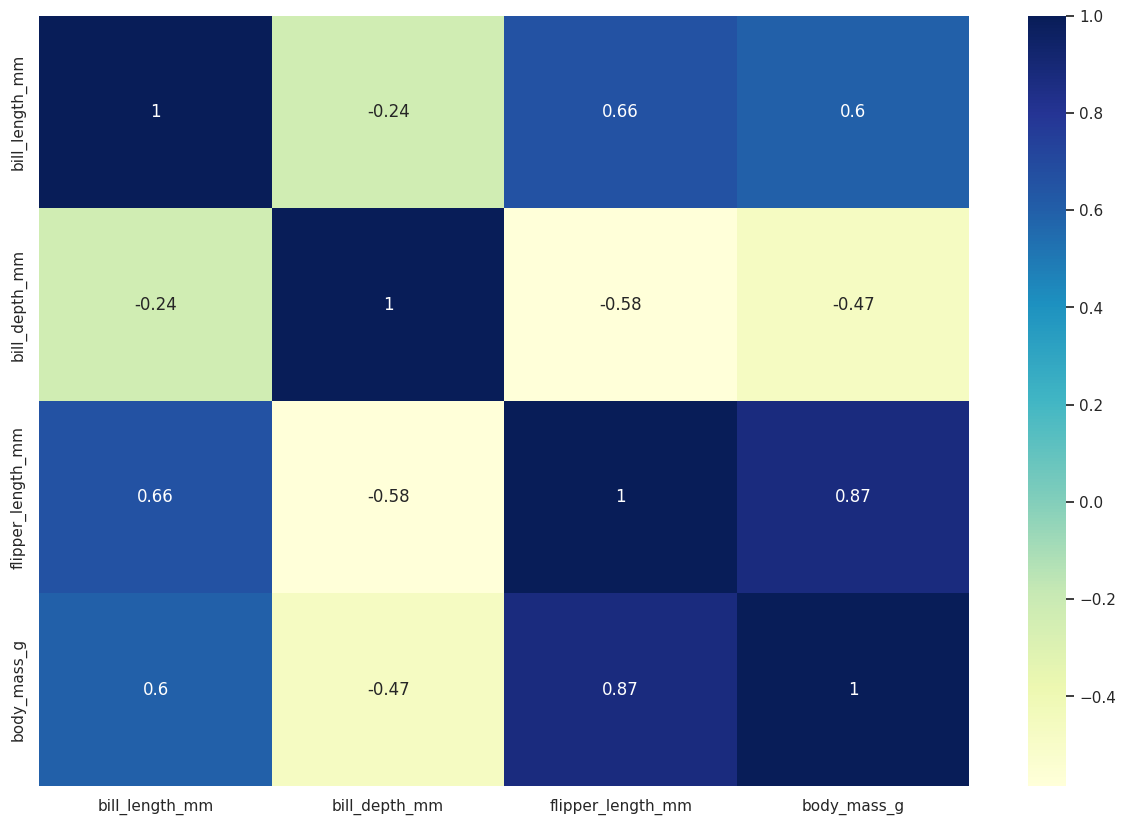

In [21]:
# 相関係数を表示
corr_columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_penguin2[corr_columns].corr(), annot=True, cmap="YlGnBu")
plt.show()

- 各変数それなりに相関が高い
- 目的変数との相関を入れていないので、多変量連関図で確認したいところ

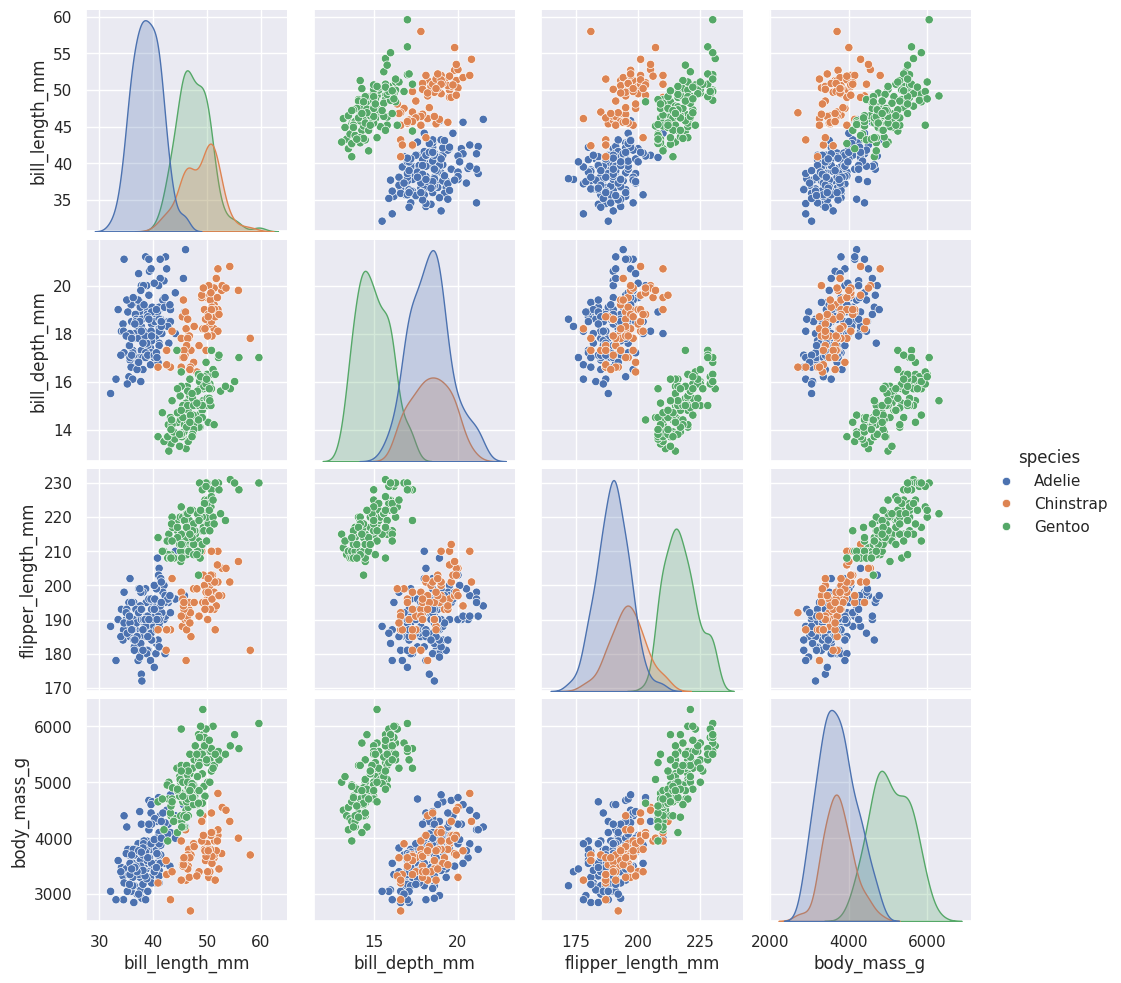

In [22]:
# 種別で層別してplot
pairplot_columns1 = corr_columns + ['species']
sns.pairplot(df_penguin2[pairplot_columns1], hue='species')

- bill_depth と bill_length ではっきり3種類に傾向が分かれています。高い精度で分類できそうです。

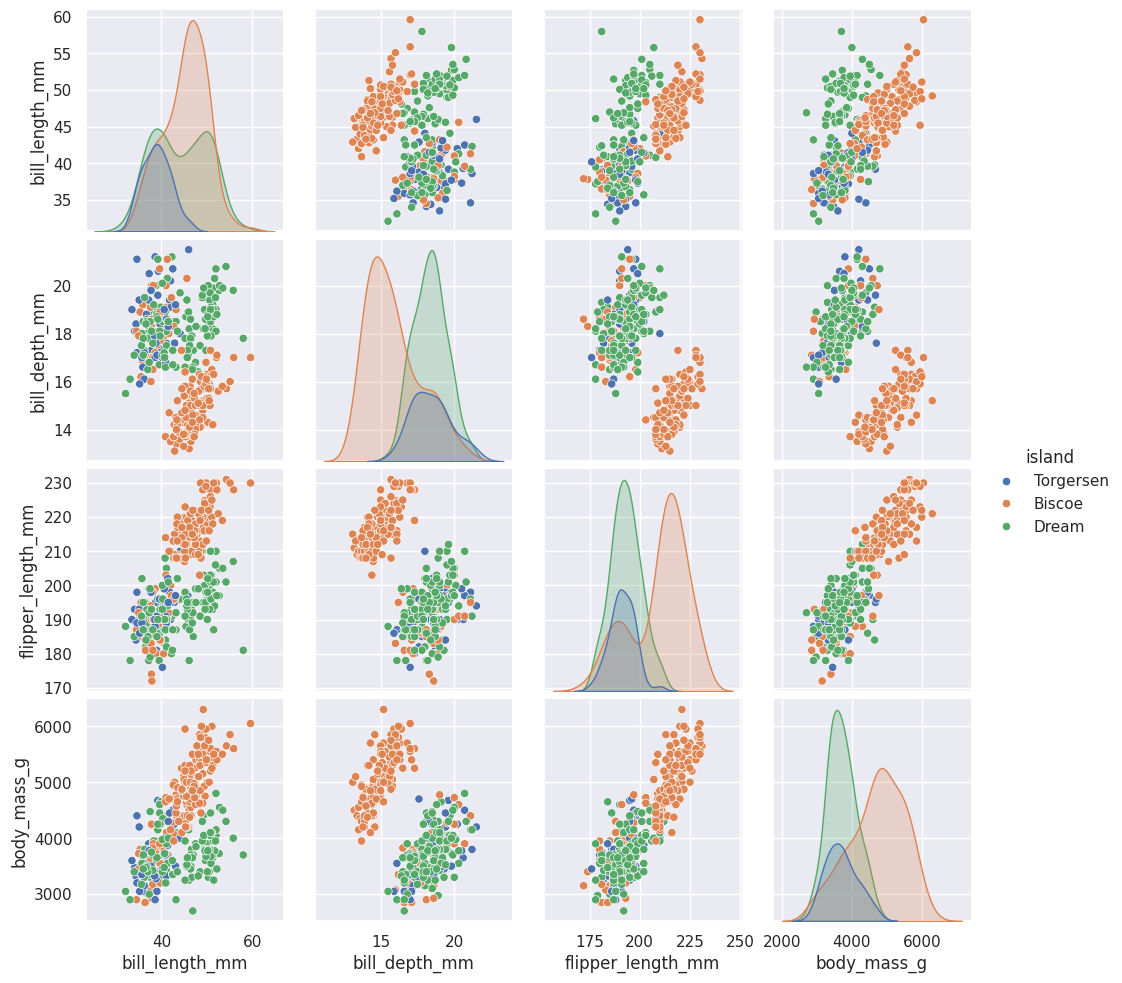

In [23]:
# 島で層別してplot
pairplot_columns2 = corr_columns + ['island']
sns.pairplot(df_penguin2[pairplot_columns2], hue='island')

- 前の種別の多変量連関図と見比べると、Gento種はBiscoe島にしかいない事がわかりますね

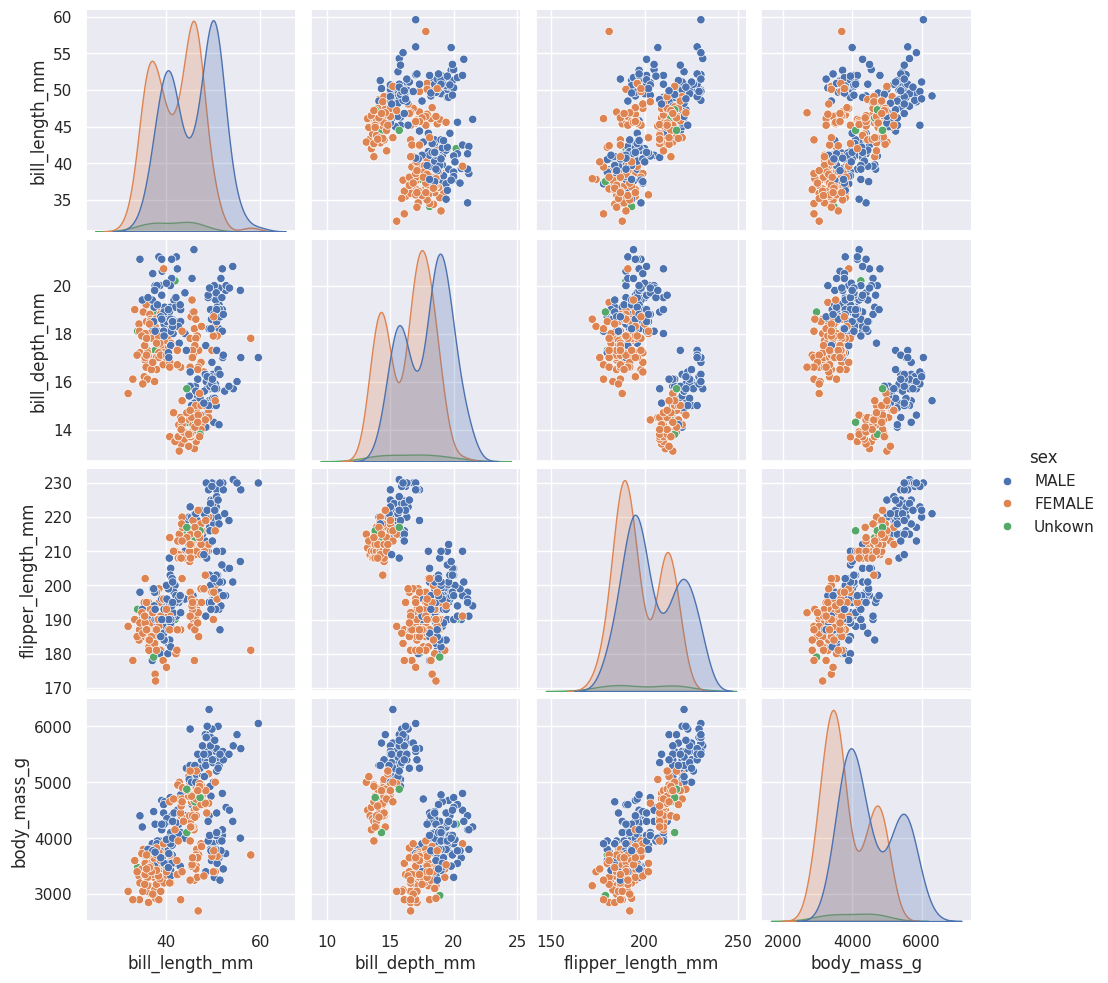

In [25]:
# 性別で層別してplot
pairplot_columns3 = corr_columns + ['sex']
sns.pairplot(df_penguin2[pairplot_columns3], hue='sex')

- オスとメスの性別差で各説明変数の差異がくっきり分かれました。
- 生物の分布なので、比較的きれいな混合ガウス分布（複数の正規分布が重なった形）に見えます。

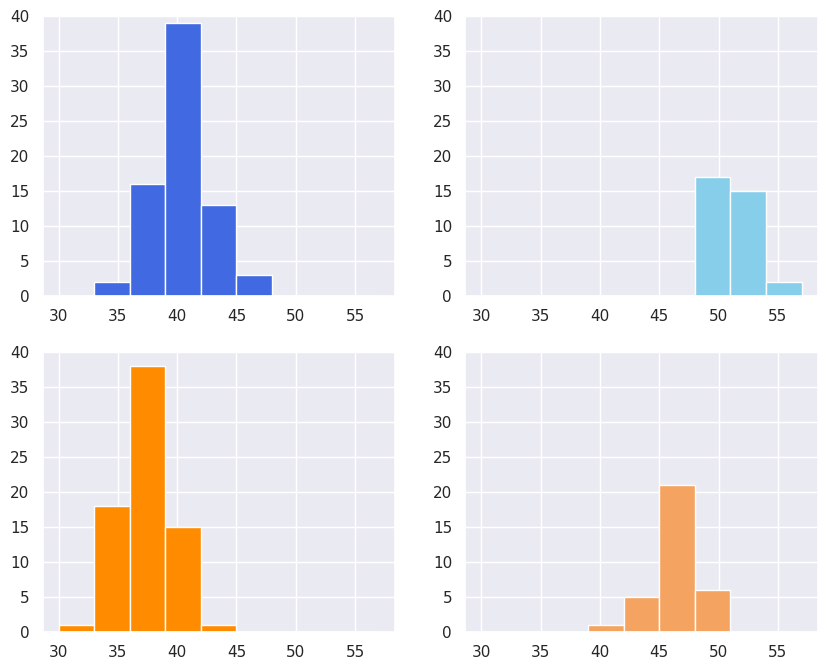

In [37]:
# ヒストグラムの表示
bins_range = range(30,60,3)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df_penguin2[(df_penguin2['sex'] == 'MALE') & (df_penguin2['species'] == 'Adelie')]['bill_length_mm'].hist(color='royalblue', bins=bins_range, ax=axes[0][0])
df_penguin2[(df_penguin2['sex'] == 'MALE') & (df_penguin2['species'] == 'Chinstrap')]['bill_length_mm'].hist(color='skyblue', bins=bins_range, ax=axes[0][1])
df_penguin2[(df_penguin2['sex'] == 'FEMALE') & (df_penguin2['species'] == 'Adelie')]['bill_length_mm'].hist(color='darkorange', bins=bins_range, ax=axes[1][0])
df_penguin2[(df_penguin2['sex'] == 'FEMALE') & (df_penguin2['species'] == 'Chinstrap')]['bill_length_mm'].hist(color='sandybrown', bins=bins_range, ax=axes[1][1])

# 上限を40に制限する
for ax1 in axes:
    for ax2 in ax1:
        ax2.set_ylim(0,40)
        

- わずかに分類しずらい点が多かったこちらの2種についても、性別で分けて'bill_length_mm' で見ると分類できそうに見えます

---
---
---
---
---